## Netflix for genes

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.learner import *
from fastai.column_data import *
import pdb

In [2]:
path='/Users/nik/fastai/data/genetflix/'

'/Users/nik/fastai/data/genetflix/'

In [4]:
ratings = pd.read_csv(path+'ratings.csv')
ratings.columns = ['sampleId', 'geneName', 'rating']

In [6]:
categs = pd.Categorical(ratings.geneName)
categs.codes
geneDict = dict(zip(categs.codes,categs))

#movie_df = pd.DataFrame(dict(zip(categs.codes,categs)).items(), columns= ['geneName', 'title'])
genes = pd.DataFrame(list(geneDict.items()), columns= ['geneName', 'title'])
genes

,geneName,title
0,457,BRAF
1,1854,HRAS
2,2157,KRAS
3,2720,NRAS
4,1264,ERBB2
5,0,AAK1
6,1,AATK
7,11,ABL1
8,14,ABL2
9,28,ACVR1


In [15]:
ratings.geneName = pd.Categorical(ratings.geneName)
ratings.geneName = ratings.geneName.cat.codes
ratings.to_csv('ratings_input.csv')
ratings

,sampleId,geneName,rating
0,687935,457,1
1,687935,1854,1
2,687935,2157,1
3,687935,2720,1
4,687936,457,1
5,687936,1854,1
6,687936,2157,1
7,687936,2720,1
8,687937,457,1
9,687937,1854,1


## Visualization

In [8]:
g=ratings.groupby('sampleId')['rating'].count()
topSamples=g.sort_values(ascending=False)[:15]

g=ratings.groupby('geneName')['rating'].count()
topGenes=g.sort_values(ascending=False)[:15]

top_r = ratings.join(topSamples, rsuffix='_r', how='inner', on='sampleId')
top_r = top_r.join(topGenes, rsuffix='_r', how='inner', on='geneName')

pd.crosstab(top_r.sampleId, top_r.geneName, top_r.rating, aggfunc=np.sum)

geneName,279,838,882,1031,1126,2077,2157,2616,2619,2834,4292,4577
sampleId,,,,,,,,,,,,
753464,1,1,1,1,1,1,1,1,1,1,1,1
753465,1,1,1,1,1,1,1,1,1,1,3,1
753467,1,1,1,1,1,1,1,1,1,1,3,1
753475,1,1,1,1,1,1,1,1,1,1,3,1
753478,1,1,1,1,1,1,1,1,1,1,1,1
919182,1,1,1,1,1,1,1,1,1,1,3,1
919183,1,1,1,1,1,1,1,1,1,1,3,1
919189,1,1,1,1,1,1,1,1,1,1,3,1
919193,1,1,1,1,1,1,1,1,1,1,3,1


## Collaborative filtering

In [10]:
val_idxs = get_cv_idxs(len(ratings))
wd=2e-4
n_factors = 50
val_idxs

array([543586, 218224, 329287, ..., 176275,  87198, 389854])

In [18]:
cf = CollabFilterDataset.from_csv(path, 'ratings_input.csv', 'sampleId', 'geneName', 'rating')
learn = cf.get_learner(n_factors, val_idxs, 64, opt_fn=optim.Adam)

In [32]:
learn.fit(1e-2, 2, wds=wd, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss                                 
    0      0.138346   0.137815  
    1      0.134952   0.138423                                 
    2      0.137181   0.137719                                 



[array([0.13772])]

In [34]:
preds = learn.predict()

/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


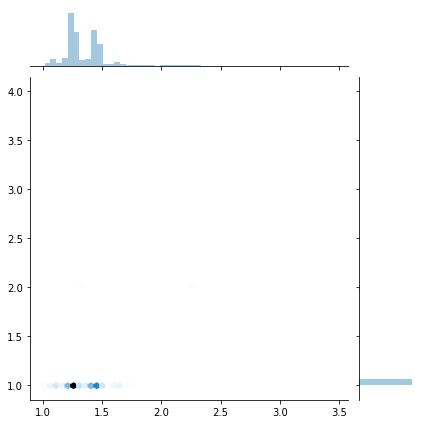

In [35]:
#y=learn.data.val_y
#sns.jointplot(preds, y, kind='hex', stat_func=None);

## Results: Gene  bias

In [17]:
genes.set_index('geneName')['title'].to_dict()
g=ratings.groupby('geneName')['rating'].count()
topGenes=g.sort_values(ascending=False).index.values[:30]
topGeneIdx = np.array([cf.item2idx[o] for o in topGenes])

In [110]:
m=learn.model; 

In [111]:
gene_bias = to_np(m.ib(V(topGeneIdx)))

In [112]:
gene_bias

array([[-3.05805],
       [-2.78139],
       [-2.72506],
       [-2.6411 ],
       [-2.53797],
       [-2.53181],
       [-2.32987],
       [-2.35355],
       [-2.55537],
       [-2.32847],
       [-2.39803],
       [-2.26403],
       [-2.21325],
       [-2.23606],
       [-2.1807 ],
       [-2.21031],
       [-2.19845],
       [-2.28494],
       [-2.14541],
       [-2.16867],
       [-2.20991],
       [-2.14754],
       [-2.18136],
       [-2.18803],
       [-2.14292],
       [-2.14502],
       [-2.13267],
       [-1.4711 ],
       [-1.8918 ],
       [-2.13206]], dtype=float32)

In [113]:
gene_ratings = [(b[0], gene_names[i]) for i,b in zip(topGenes,gene_bias)]

### Embedding interpretation

We can now do the same thing for the embeddings.

In [117]:
gene_emb = to_np(m.i(V(topGeneIdx)))
gene_emb.shape

(30, 50)

We use [PCA](https://plot.ly/ipython-notebooks/principal-component-analysis/) to simplify them down to just 3 vectors. 

In [118]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
gene_pca = pca.fit(gene_emb.T).components_

In [119]:
gene_pca.shape

(3, 30)

In [120]:
fac0 = gene_pca[0]
gene_comp = [(f, gene_names[i]) for f,i in zip(fac0, topGenes)]

Here's the 1st component.

In [121]:
sorted(gene_comp, key=itemgetter(0), reverse=True)[:10]

[(0.5237996, 'KDM6A'),
 (0.28307143, 'ATM'),
 (0.20405562, 'SETD2'),
 (0.19898452, 'BCOR'),
 (0.19870092, 'EP300'),
 (0.19702035, 'BRAF'),
 (0.19299254, 'BAP1'),
 (0.19226877, 'ASXL1'),
 (0.18057026, 'MAX'),
 (0.1752226, 'FGFR1')]

In [122]:
sorted(gene_comp, key=itemgetter(0))[:10]

[(0.008012491, 'DROSHA'),
 (0.040990014, 'VHL'),
 (0.05312201, 'WT1'),
 (0.06994025, 'AMER1'),
 (0.07223304, 'CTNNB1'),
 (0.09465895, 'TP53'),
 (0.10085832, 'KRAS'),
 (0.10726049, 'TERT'),
 (0.13908865, 'DICER1'),
 (0.13977413, 'PBRM1')]

In [123]:
fac1 = gene_pca[1]
gene_comp = [(f, gene_names[i]) for f,i in zip(fac1, topGenes)]

Here's the 2nd component. 

In [124]:
sorted(gene_comp, key=itemgetter(0), reverse=True)[:10]

[(0.42842364, 'MAX'),
 (0.29186866, 'BRAF'),
 (0.24375258, 'MYCN'),
 (0.23782526, 'PBRM1'),
 (0.22299135, 'PALB2'),
 (0.19940251, 'NF2'),
 (0.1648359, 'ASXL1'),
 (0.12759572, 'BCOR'),
 (0.11796281, 'TERT'),
 (0.10990749, 'ARID1A')]

In [125]:
sorted(gene_comp, key=itemgetter(0))[:10]

[(-0.40784088, 'KDM5C'),
 (-0.3076501, 'FGFR1'),
 (-0.30380654, 'KDM6A'),
 (-0.22780061, 'CHEK2'),
 (-0.16510561, 'ATM'),
 (-0.075650364, 'DICER1'),
 (-0.06524513, 'CREBBP'),
 (-0.04101261, 'BAP1'),
 (-0.025104374, 'DROSHA'),
 (-0.018988311, 'TP53')]

We can draw a picture to see how various genes appear on the map of these components. 
This picture shows the first two components.

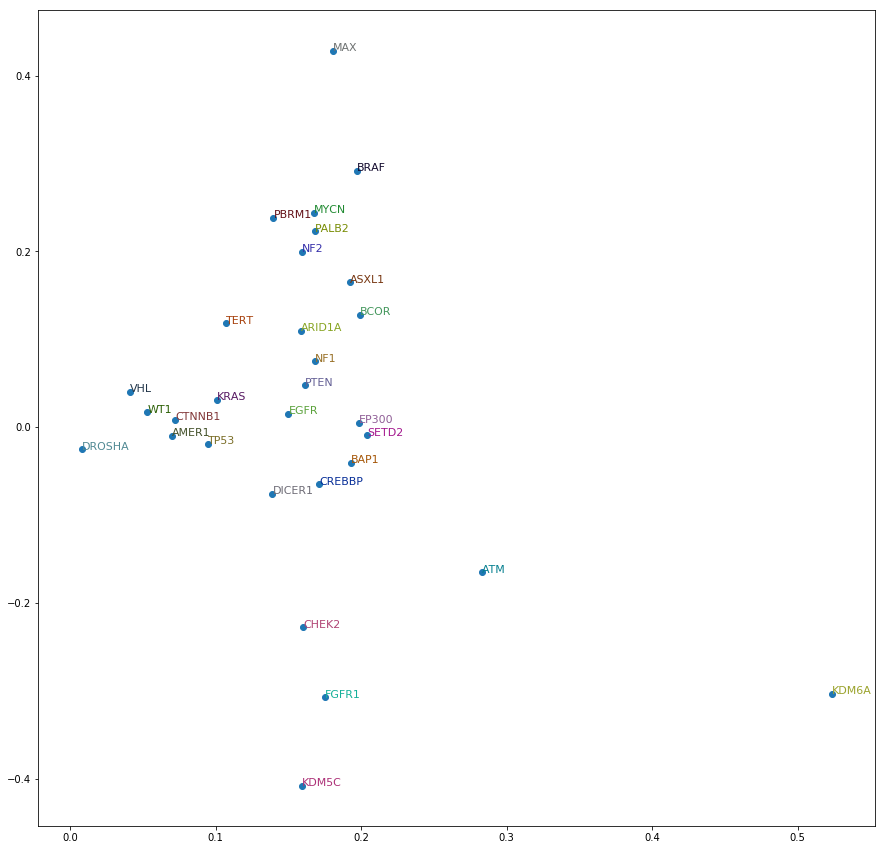

In [134]:
idxs = np.random.choice(len(topGenes), 30, replace=False)
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(topGenes[idxs], X, Y):
    plt.text(x,y,gene_names[i], color=np.random.rand(3)*0.7, fontsize=11)
plt.show()